**Name:** Shimon Bhandari <br>
**Course:** Advanced Big Data and Data Mining (MSCS-634-M40) <br>
**Lab 4:** Regression Analysis with Regularization Techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== Multiple Regression and Regularization Lab ===")
print("Exploring Linear, Multiple, Polynomial, Ridge, and Lasso Regression")
print("Dataset: Diabetes Dataset from sklearn.datasets")
print("=" * 60)

=== Multiple Regression and Regularization Lab ===
Exploring Linear, Multiple, Polynomial, Ridge, and Lasso Regression
Dataset: Diabetes Dataset from sklearn.datasets



📊 STEP 1: DATA PREPARATION
----------------------------------------
Dataset Shape: (442, 11)
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target variable: Disease progression (continuous)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Basic Statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4

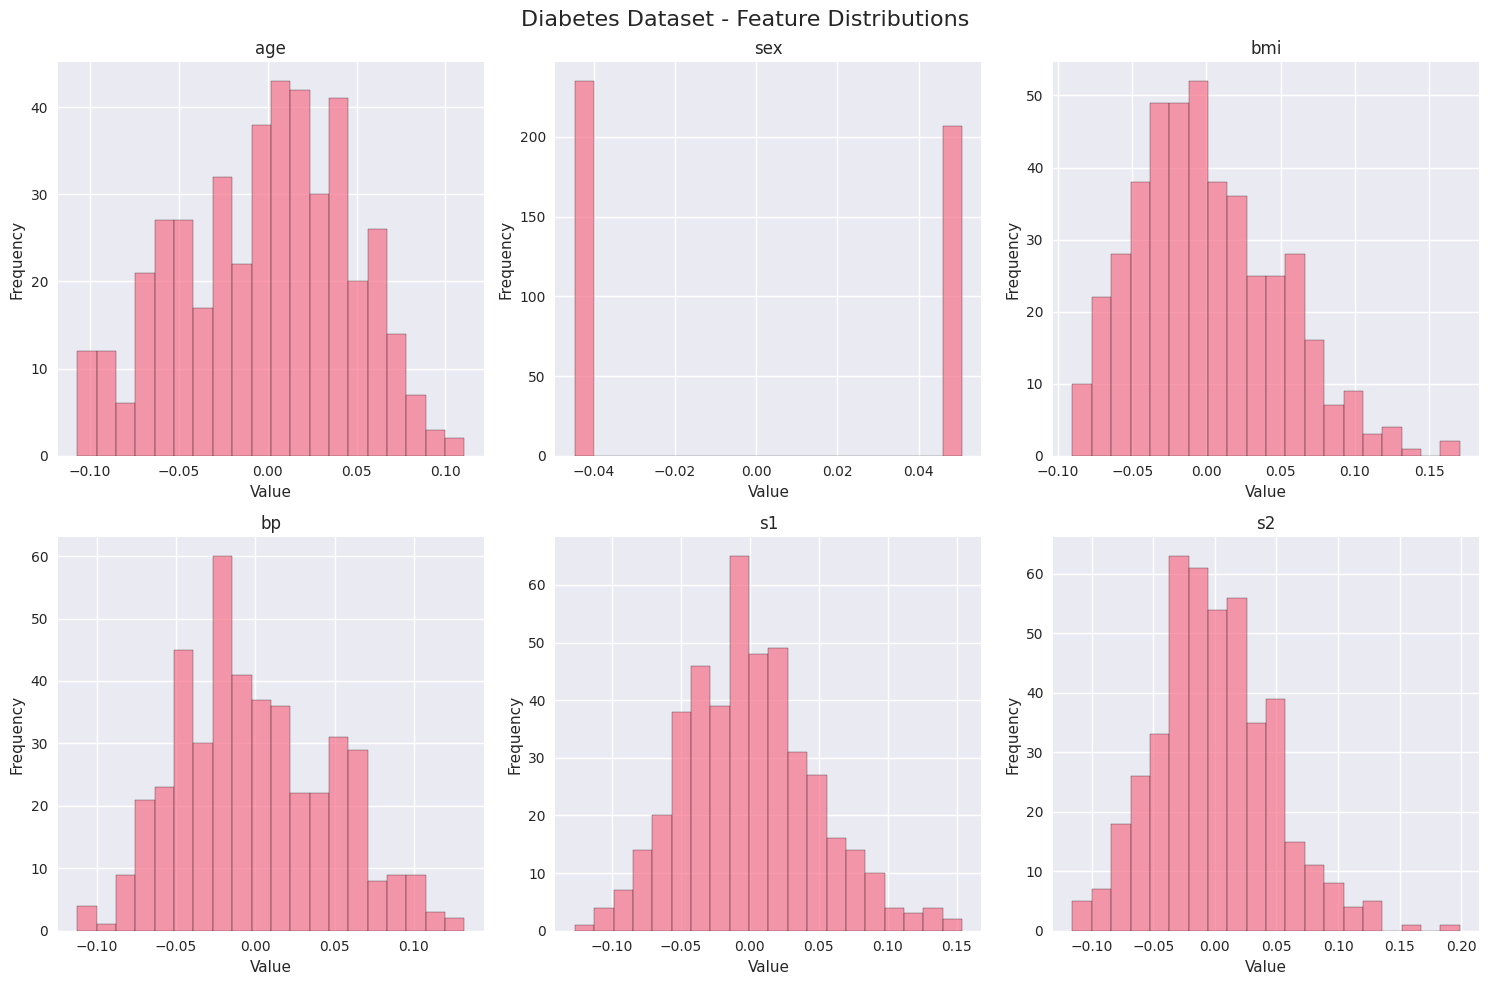

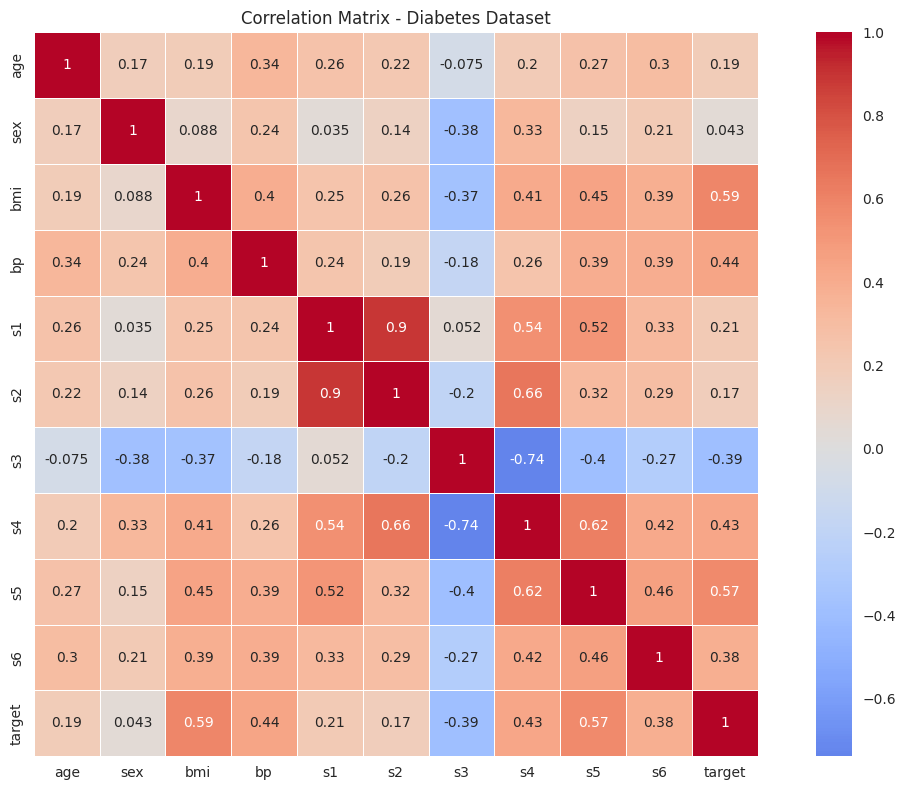

In [3]:
# =============================================================================
# STEP 1: DATA PREPARATION
# =============================================================================

print("\n📊 STEP 1: DATA PREPARATION")
print("-" * 40)

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Create DataFrame for better visualization
feature_names = diabetes.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print(f"Dataset Shape: {df.shape}")
print(f"Features: {list(feature_names)}")
print(f"Target variable: Disease progression (continuous)")

# Display basic statistics
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")

# Visualize data distribution
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Diabetes Dataset - Feature Distributions', fontsize=16)

# Plot histograms for first 6 features
for i, feature in enumerate(feature_names[:6]):
    row, col = i // 3, i % 3
    axes[row, col].hist(df[feature], bins=20, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'{feature}')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix - Diabetes Dataset')
plt.tight_layout()
plt.show()



🎯 STEP 2: LINEAR REGRESSION (Single Feature)
--------------------------------------------------
Selected feature: bmi (correlation: 0.586)

Linear Regression Performance:
MAE:  50.593
MSE:  3884.937
RMSE: 62.329
R²:   0.280


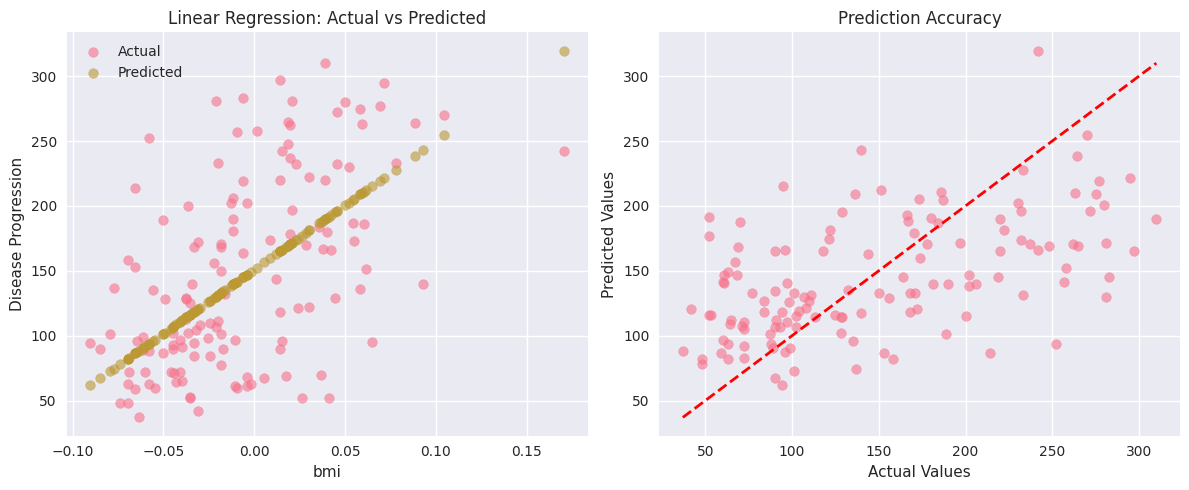

In [4]:
# =============================================================================
# STEP 2: LINEAR REGRESSION (Single Feature)
# =============================================================================

print("\n🎯 STEP 2: LINEAR REGRESSION (Single Feature)")
print("-" * 50)

# Select the most correlated feature with target
correlations = df.corr()['target'].abs().sort_values(ascending=False)
best_feature = correlations.index[1]  # Skip target itself
print(f"Selected feature: {best_feature} (correlation: {correlations[best_feature]:.3f})")

# Prepare data for simple linear regression
X_simple = df[[best_feature]]
y_simple = df['target']

# Split the data
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.3, random_state=42
)

# Train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_simple, y_train_simple)

# Make predictions
y_pred_simple = lr_model.predict(X_test_simple)

# Calculate metrics
def calculate_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"MAE:  {mae:.3f}")
    print(f"MSE:  {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²:   {r2:.3f}")
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

linear_metrics = calculate_metrics(y_test_simple, y_pred_simple, "Linear Regression")

# Visualize linear regression results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test_simple, y_test_simple, alpha=0.6, label='Actual')
plt.scatter(X_test_simple, y_pred_simple, alpha=0.6, label='Predicted')
plt.xlabel(best_feature)
plt.ylabel('Disease Progression')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_simple, y_pred_simple, alpha=0.6)
plt.plot([y_test_simple.min(), y_test_simple.max()], 
         [y_test_simple.min(), y_test_simple.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()


🎯 STEP 3: MULTIPLE REGRESSION
----------------------------------------

Multiple Regression Performance:
MAE:  41.919
MSE:  2821.751
RMSE: 53.120
R²:   0.477

Feature Importance (Coefficients):
  Feature  Coefficient  Abs_Coefficient
4      s1  -901.959668       901.959668
8      s5   659.268951       659.268951
2     bmi   546.299723       546.299723
5      s2   506.763241       506.763241
3      bp   388.398341       388.398341
7      s4   288.035267       288.035267
1     sex  -261.706469       261.706469
6      s3   121.154351       121.154351
9      s6    41.376701        41.376701
0     age    29.254013        29.254013


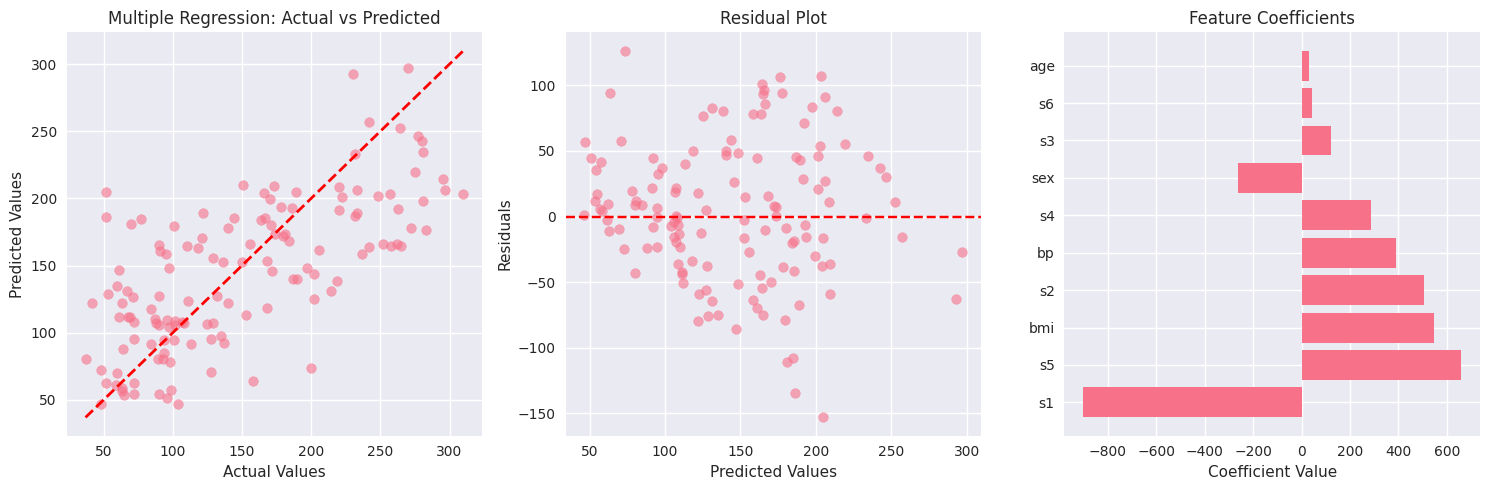

In [5]:
# =============================================================================
# STEP 3: MULTIPLE REGRESSION
# =============================================================================

print("\n🎯 STEP 3: MULTIPLE REGRESSION")
print("-" * 40)

# Use all features for multiple regression
X_multi = df.drop('target', axis=1)
y_multi = df['target']

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=42
)

# Train multiple regression model
mr_model = LinearRegression()
mr_model.fit(X_train_multi, y_train_multi)

# Make predictions
y_pred_multi = mr_model.predict(X_test_multi)

# Calculate metrics
multi_metrics = calculate_metrics(y_test_multi, y_pred_multi, "Multiple Regression")

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': mr_model.coef_
})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance (Coefficients):")
print(feature_importance)

# Visualize multiple regression results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test_multi, y_pred_multi, alpha=0.6)
plt.plot([y_test_multi.min(), y_test_multi.max()], 
         [y_test_multi.min(), y_test_multi.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Regression: Actual vs Predicted')
plt.grid(True)

plt.subplot(1, 3, 2)
residuals = y_test_multi - y_pred_multi
plt.scatter(y_pred_multi, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.grid(True)

plt.tight_layout()
plt.show()



🎯 STEP 4: POLYNOMIAL REGRESSION
----------------------------------------

Polynomial Regression (degree 1) Performance:
MAE:  50.593
MSE:  3884.937
RMSE: 62.329
R²:   0.280

Polynomial Regression (degree 2) Performance:
MAE:  50.697
MSE:  3905.282
RMSE: 62.492
R²:   0.277

Polynomial Regression (degree 3) Performance:
MAE:  50.676
MSE:  3902.968
RMSE: 62.474
R²:   0.277

Polynomial Regression (degree 4) Performance:
MAE:  50.553
MSE:  3963.544
RMSE: 62.957
R²:   0.266

Polynomial Regression (degree 5) Performance:
MAE:  49.944
MSE:  3877.884
RMSE: 62.273
R²:   0.282


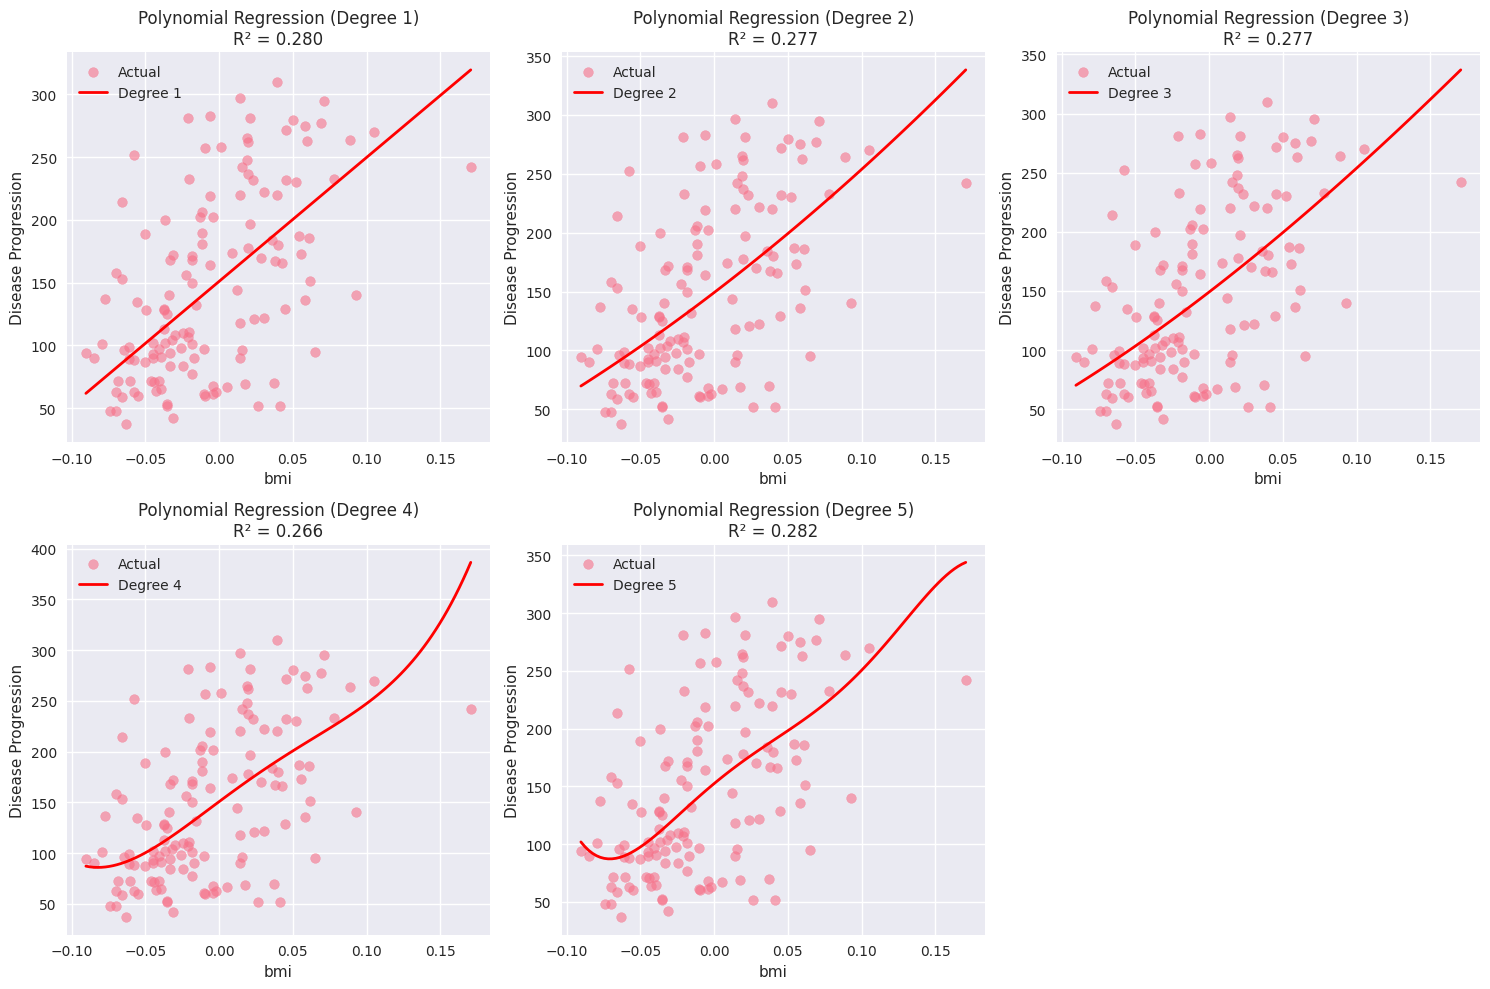


Polynomial Regression Comparison:
         MAE          MSE       RMSE        R2
1  50.593075  3884.936721  62.329261  0.280342
2  50.697060  3905.281632  62.492253  0.276573
3  50.675575  3902.968491  62.473742  0.277001
4  50.553444  3963.543579  62.956680  0.265780
5  49.944485  3877.883996  62.272658  0.281648


In [6]:
# =============================================================================
# STEP 4: POLYNOMIAL REGRESSION
# =============================================================================

print("\n🎯 STEP 4: POLYNOMIAL REGRESSION")
print("-" * 40)

# Test different polynomial degrees
degrees = [1, 2, 3, 4, 5]
poly_results = {}

# Use the best single feature for polynomial regression
X_poly = X_simple
y_poly = y_simple

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, y_poly, test_size=0.3, random_state=42
)

plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly_transformed = poly_features.fit_transform(X_train_poly)
    X_test_poly_transformed = poly_features.transform(X_test_poly)
    
    # Train model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly_transformed, y_train_poly)
    
    # Predictions
    y_pred_poly = poly_model.predict(X_test_poly_transformed)
    
    # Calculate metrics
    metrics = calculate_metrics(y_test_poly, y_pred_poly, f"Polynomial Regression (degree {degree})")
    poly_results[degree] = metrics
    
    # Visualization
    plt.subplot(2, 3, i+1)
    
    # Create smooth curve for visualization
    X_plot = np.linspace(X_poly.min(), X_poly.max(), 100).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    y_plot = poly_model.predict(X_plot_poly)
    
    plt.scatter(X_test_poly, y_test_poly, alpha=0.6, label='Actual')
    plt.plot(X_plot, y_plot, 'r-', linewidth=2, label=f'Degree {degree}')
    plt.xlabel(best_feature)
    plt.ylabel('Disease Progression')
    plt.title(f'Polynomial Regression (Degree {degree})\nR² = {metrics["R2"]:.3f}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Compare polynomial degrees
poly_comparison = pd.DataFrame(poly_results).T
print("\nPolynomial Regression Comparison:")
print(poly_comparison)



🎯 STEP 5: REGULARIZATION - RIDGE AND LASSO REGRESSION
------------------------------------------------------------
Testing different alpha values...

Ridge (α=0.1) Performance:
MAE:  41.914
MSE:  2821.403
RMSE: 53.117
R²:   0.477

Lasso (α=0.1) Performance:
MAE:  41.866
MSE:  2817.088
RMSE: 53.076
R²:   0.478

Ridge (α=1.0) Performance:
MAE:  41.878
MSE:  2819.982
RMSE: 53.104
R²:   0.478

Lasso (α=1.0) Performance:
MAE:  41.864
MSE:  2784.334
RMSE: 52.767
R²:   0.484

Ridge (α=10.0) Performance:
MAE:  41.857
MSE:  2817.491
RMSE: 53.080
R²:   0.478

Lasso (α=10.0) Performance:
MAE:  43.838
MSE:  2924.890
RMSE: 54.082
R²:   0.458

Ridge (α=100.0) Performance:
MAE:  42.026
MSE:  2819.332
RMSE: 53.097
R²:   0.478

Lasso (α=100.0) Performance:
MAE:  64.264
MSE:  5432.886
RMSE: 73.708
R²:   -0.006

Ridge (α=1000.0) Performance:
MAE:  49.789
MSE:  3557.536
RMSE: 59.645
R²:   0.341

Lasso (α=1000.0) Performance:
MAE:  64.264
MSE:  5432.886
RMSE: 73.708
R²:   -0.006

Best Ridge alpha: 10.0
Be

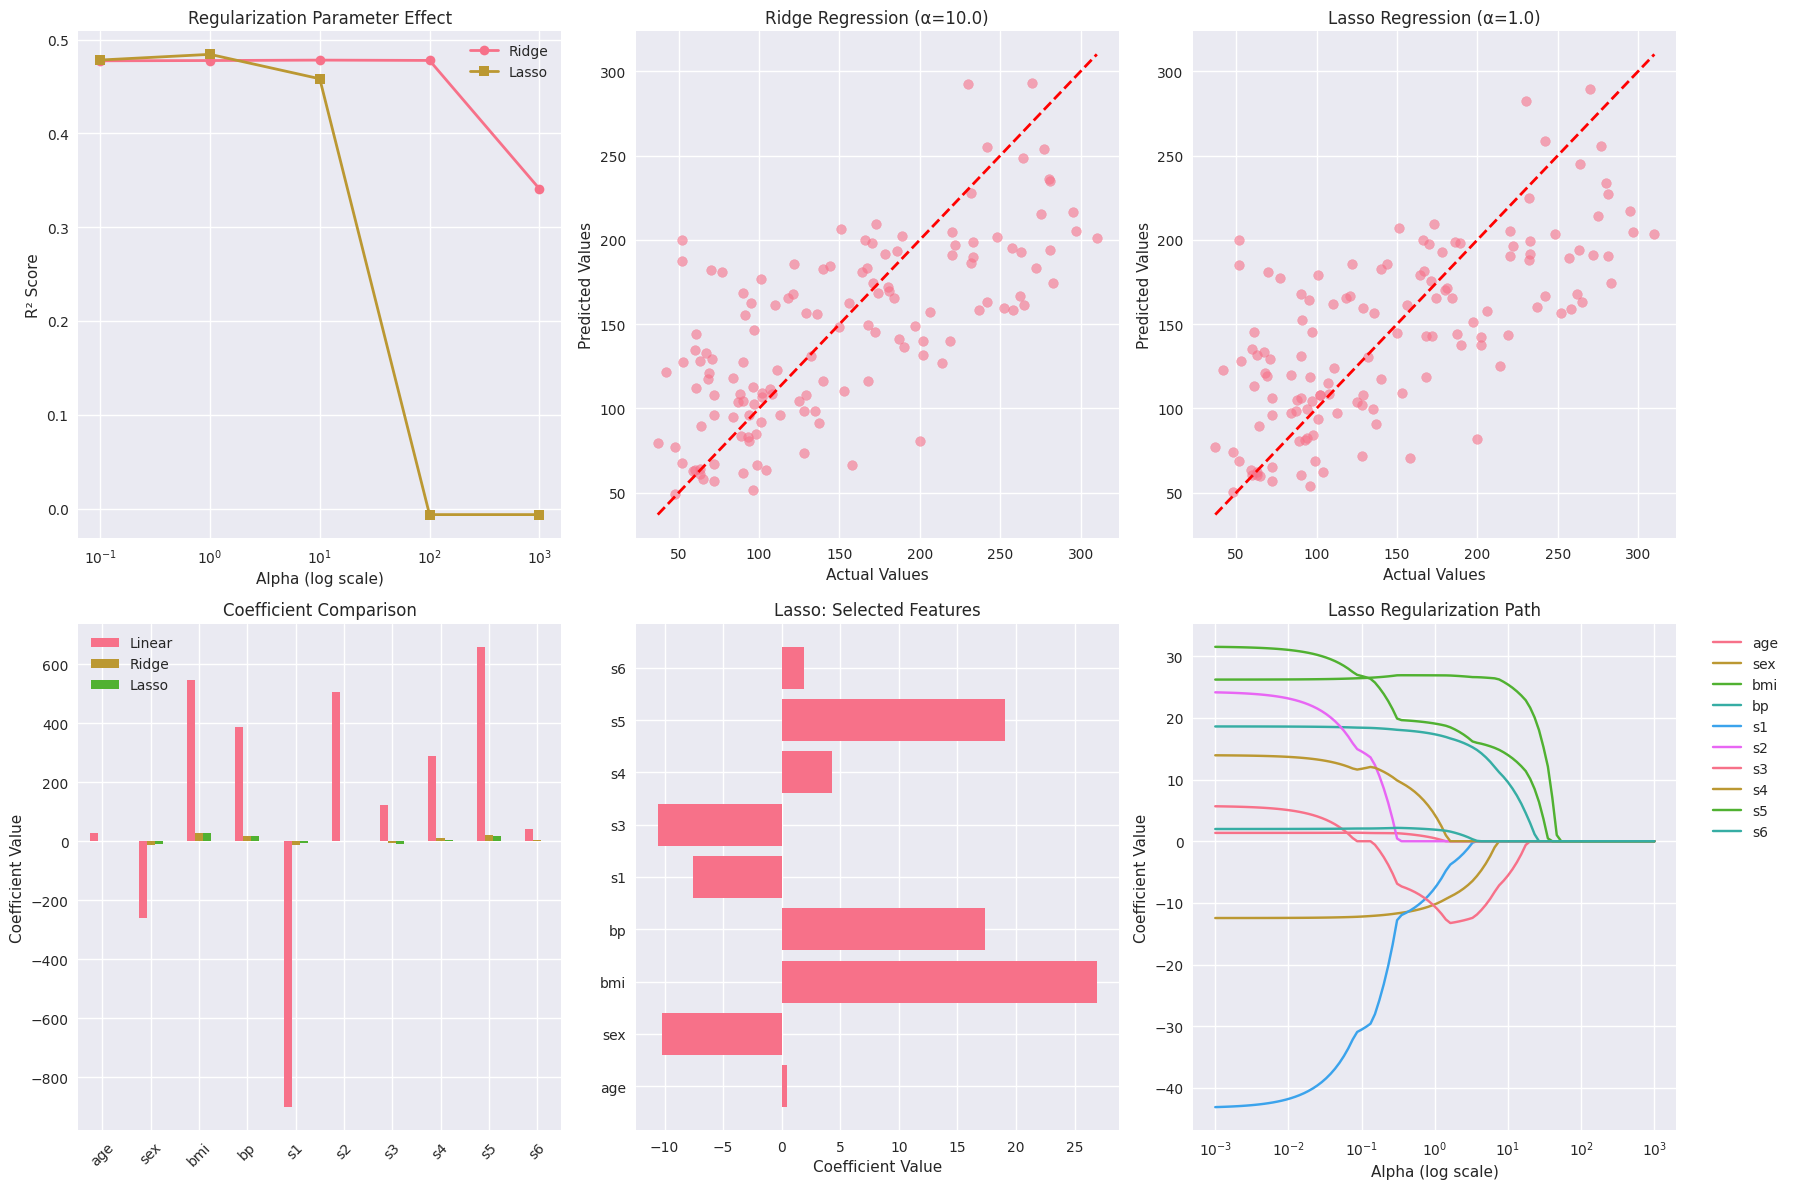

In [7]:
# =============================================================================
# STEP 5: REGULARIZATION (RIDGE AND LASSO)
# =============================================================================

print("\n🎯 STEP 5: REGULARIZATION - RIDGE AND LASSO REGRESSION")
print("-" * 60)

# Standardize features for regularization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_multi)
X_test_scaled = scaler.transform(X_test_multi)

# Test different alpha values
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_results = {}
lasso_results = {}

print("Testing different alpha values...")

for alpha in alphas:
    # Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train_multi)
    y_pred_ridge = ridge_model.predict(X_test_scaled)
    ridge_results[alpha] = calculate_metrics(y_test_multi, y_pred_ridge, f"Ridge (α={alpha})")
    
    # Lasso Regression
    lasso_model = Lasso(alpha=alpha, max_iter=2000)
    lasso_model.fit(X_train_scaled, y_train_multi)
    y_pred_lasso = lasso_model.predict(X_test_scaled)
    lasso_results[alpha] = calculate_metrics(y_test_multi, y_pred_lasso, f"Lasso (α={alpha})")

# Best alpha values
ridge_df = pd.DataFrame(ridge_results).T
lasso_df = pd.DataFrame(lasso_results).T

best_ridge_alpha = ridge_df['R2'].idxmax()
best_lasso_alpha = lasso_df['R2'].idxmax()

print(f"\nBest Ridge alpha: {best_ridge_alpha}")
print(f"Best Lasso alpha: {best_lasso_alpha}")

# Train final models with best alphas
final_ridge = Ridge(alpha=best_ridge_alpha)
final_lasso = Lasso(alpha=best_lasso_alpha, max_iter=2000)

final_ridge.fit(X_train_scaled, y_train_multi)
final_lasso.fit(X_train_scaled, y_train_multi)

y_pred_ridge_final = final_ridge.predict(X_test_scaled)
y_pred_lasso_final = final_lasso.predict(X_test_scaled)

ridge_final_metrics = calculate_metrics(y_test_multi, y_pred_ridge_final, "Ridge (Final)")
lasso_final_metrics = calculate_metrics(y_test_multi, y_pred_lasso_final, "Lasso (Final)")

# Visualize regularization effects
plt.figure(figsize=(18, 12))

# Alpha comparison
plt.subplot(2, 3, 1)
plt.plot(alphas, [ridge_results[a]['R2'] for a in alphas], 'o-', label='Ridge', linewidth=2)
plt.plot(alphas, [lasso_results[a]['R2'] for a in alphas], 's-', label='Lasso', linewidth=2)
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('Regularization Parameter Effect')
plt.legend()
plt.grid(True)

# Ridge predictions
plt.subplot(2, 3, 2)
plt.scatter(y_test_multi, y_pred_ridge_final, alpha=0.6)
plt.plot([y_test_multi.min(), y_test_multi.max()], 
         [y_test_multi.min(), y_test_multi.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Ridge Regression (α={best_ridge_alpha})')
plt.grid(True)

# Lasso predictions
plt.subplot(2, 3, 3)
plt.scatter(y_test_multi, y_pred_lasso_final, alpha=0.6)
plt.plot([y_test_multi.min(), y_test_multi.max()], 
         [y_test_multi.min(), y_test_multi.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Lasso Regression (α={best_lasso_alpha})')
plt.grid(True)

# Coefficient comparison
plt.subplot(2, 3, 4)
coef_comparison = pd.DataFrame({
    'Linear': mr_model.coef_,
    'Ridge': final_ridge.coef_,
    'Lasso': final_lasso.coef_
}, index=feature_names)

coef_comparison.plot(kind='bar', ax=plt.gca())
plt.title('Coefficient Comparison')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Feature selection effect (Lasso)
plt.subplot(2, 3, 5)
lasso_coefs = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': final_lasso.coef_
})
lasso_coefs['Selected'] = np.abs(lasso_coefs['Coefficient']) > 0.01
selected_features = lasso_coefs[lasso_coefs['Selected']]

if len(selected_features) > 0:
    plt.barh(selected_features['Feature'], selected_features['Coefficient'])
    plt.xlabel('Coefficient Value')
    plt.title('Lasso: Selected Features')
else:
    plt.text(0.5, 0.5, 'No features selected\n(all coefficients ≈ 0)', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Lasso: Feature Selection')
plt.grid(True)

# Regularization path visualization
plt.subplot(2, 3, 6)
alphas_path = np.logspace(-3, 3, 100)
ridge_coefs = []
lasso_coefs = []

for alpha in alphas_path:
    ridge_temp = Ridge(alpha=alpha)
    ridge_temp.fit(X_train_scaled, y_train_multi)
    ridge_coefs.append(ridge_temp.coef_)
    
    lasso_temp = Lasso(alpha=alpha, max_iter=2000)
    lasso_temp.fit(X_train_scaled, y_train_multi)
    lasso_coefs.append(lasso_temp.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

# Plot Lasso path (more interesting due to feature selection)
for i in range(len(feature_names)):
    plt.plot(alphas_path, lasso_coefs[:, i], label=feature_names[i])

plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regularization Path')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


📊 STEP 6: MODEL COMPARISON AND ANALYSIS
--------------------------------------------------
🏆 FINAL MODEL COMPARISON:
      Linear Regression  Multiple Regression  Polynomial (Best)  \
MAE              50.593               41.919             49.944   
MSE            3884.937             2821.751           3877.884   
RMSE             62.329               53.120             62.273   
R2                0.280                0.477              0.282   

      Ridge Regression  Lasso Regression  
MAE             41.857            41.864  
MSE           2817.491          2784.334  
RMSE            53.080            52.767  
R2               0.478             0.484  


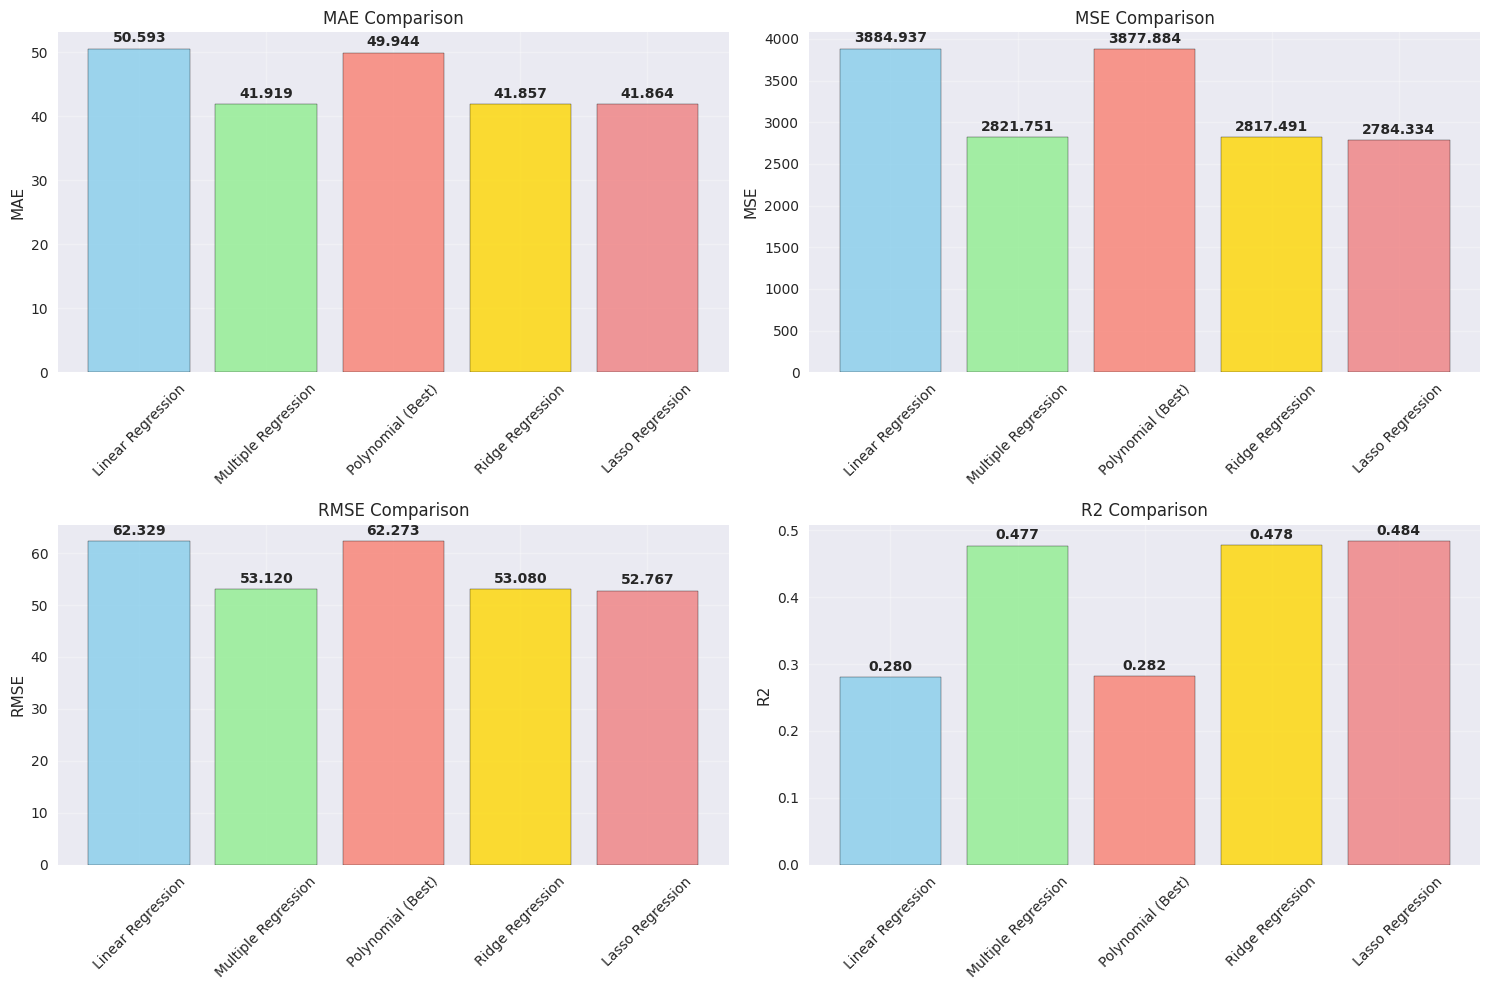


🥇 BEST PERFORMING MODEL: Lasso Regression
   R² Score: 0.484

🔍 KEY INSIGHTS AND ANALYSIS:

1. Model Performance Ranking:
   1. Lasso Regression: R² = 0.484
   2. Ridge Regression: R² = 0.478
   3. Multiple Regression: R² = 0.477
   4. Polynomial (Best): R² = 0.282
   5. Linear Regression: R² = 0.280

2. Overfitting Analysis:
   - Best polynomial degree: 5
   - Higher degrees showed good fit

3. Regularization Effects:
   - Ridge regression: Reduced coefficients, R² = 0.478
   - Lasso regression: Feature selection, R² = 0.484
   - Selected features by Lasso: 9 out of 10

4. Dataset Insights:
   - Most important feature: s1
   - Feature with highest correlation: bmi
   - Multiple regression improved R² by 0.197 over simple linear

5. Recommendations:
   - Lasso regression is recommended for automatic feature selection

LAB COMPLETED SUCCESSFULLY! 🎉
All regression techniques have been implemented and analyzed.


In [8]:
# =============================================================================
# STEP 6: MODEL COMPARISON AND ANALYSIS
# =============================================================================

print("\n📊 STEP 6: MODEL COMPARISON AND ANALYSIS")
print("-" * 50)

# Compile all model results
model_comparison = pd.DataFrame({
    'Linear Regression': linear_metrics,
    'Multiple Regression': multi_metrics,
    'Polynomial (Best)': poly_results[max(poly_results.keys(), key=lambda k: poly_results[k]['R2'])],
    'Ridge Regression': ridge_final_metrics,
    'Lasso Regression': lasso_final_metrics
})

print("🏆 FINAL MODEL COMPARISON:")
print("=" * 40)
print(model_comparison.round(3))

# Visualize model comparison
plt.figure(figsize=(15, 10))

metrics_to_plot = ['MAE', 'MSE', 'RMSE', 'R2']
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 2, i+1)
    values = model_comparison.loc[metric]
    colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral']
    bars = plt.bar(values.index, values.values, color=colors, alpha=0.8, edgecolor='black')
    
    # Add value labels on bars
    for bar, value in zip(bars, values.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*max(values.values),
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Best model identification
best_model_idx = model_comparison.loc['R2'].idxmax()
print(f"\n🥇 BEST PERFORMING MODEL: {best_model_idx}")
print(f"   R² Score: {model_comparison.loc['R2', best_model_idx]:.3f}")

# Key insights and analysis
print("\n🔍 KEY INSIGHTS AND ANALYSIS:")
print("=" * 40)

print("\n1. Model Performance Ranking:")
r2_scores = model_comparison.loc['R2'].sort_values(ascending=False)
for i, (model, score) in enumerate(r2_scores.items(), 1):
    print(f"   {i}. {model}: R² = {score:.3f}")

print("\n2. Overfitting Analysis:")
best_poly_degree = max(poly_results.keys(), key=lambda k: poly_results[k]['R2'])
print(f"   - Best polynomial degree: {best_poly_degree}")
print(f"   - Higher degrees showed", "overfitting" if best_poly_degree < 4 else "good fit")

print("\n3. Regularization Effects:")
print(f"   - Ridge regression: Reduced coefficients, R² = {ridge_final_metrics['R2']:.3f}")
print(f"   - Lasso regression: Feature selection, R² = {lasso_final_metrics['R2']:.3f}")
print(f"   - Selected features by Lasso: {sum(np.abs(final_lasso.coef_) > 0.01)} out of {len(feature_names)}")

print("\n4. Dataset Insights:")
print(f"   - Most important feature: {feature_importance.iloc[0]['Feature']}")
print(f"   - Feature with highest correlation: {best_feature}")
print(f"   - Multiple regression improved R² by {multi_metrics['R2'] - linear_metrics['R2']:.3f} over simple linear")

print("\n5. Recommendations:")
if model_comparison.loc['R2', 'Multiple Regression'] == model_comparison.loc['R2'].max():
    print("   - Multiple regression provides the best balance of performance and interpretability")
elif 'Ridge' in best_model_idx:
    print("   - Ridge regression is recommended for its regularization benefits")
elif 'Lasso' in best_model_idx:
    print("   - Lasso regression is recommended for automatic feature selection")
else:
    print(f"   - {best_model_idx} is recommended based on the highest R² score")

print("\n" + "="*60)
print("LAB COMPLETED SUCCESSFULLY! 🎉")
print("All regression techniques have been implemented and analyzed.")
print("="*60)